# Data Preparation

In [1]:
import pandas as pd
import numpy as np
import random
import os

In [5]:
age = []
fbs = []
bp = []
chol = []
chest_pain = [] 
height = []
weight =[]

In [6]:
for i in range(20000):
    chpain_t = np.random.randint(0,2)
    chol_t = np.random.randint(150,351)
    fbs_t = np.random.randint(50,201)
    height_t = np.random.randint(140,191)
    weight_t = np.random.randint(35,111)
    bp_t = np.random.randint(75,261)
    if i%5==0 or i%3==0:
        age_t = np.random.choice([np.random.randint(20,46),np.random.randint(71,86)])
    else:
        age_t = np.random.randint(45,71)
    age.append(age_t)
    height.append(height_t)
    weight.append(weight_t)
    chest_pain.append(chpain_t)
    bp.append(bp_t)
    fbs.append(fbs_t)
    chol.append(chol_t)

In [7]:
heart_dict = {'age':age, 'height':height, 'weight':weight, 'chest_pain':chest_pain, 'bp':bp, 'fbs':fbs, 'chol':chol}

In [8]:
df_heart = pd.DataFrame(heart_dict)

In [9]:
df_heart

,age,height,weight,chest_pain,bp,fbs,chol
0,76,159,52,0,213,170,305
1,56,176,46,1,244,98,340
2,45,161,101,0,215,176,165
3,34,152,61,1,79,147,170
4,49,180,108,0,184,168,229
...,...,...,...,...,...,...,...
19995,76,190,37,0,229,104,179
19996,48,153,63,0,94,188,259
19997,62,158,38,0,255,86,266
19998,71,165,65,0,169,194,157


In [10]:
df_heart.to_csv('heart_data.csv',index=False)

# Data Filtering

In [76]:
df = pd.read_csv('heart_data.csv')

In [77]:
df1 = pd.read_csv('heart_data.csv')

In [80]:
df

,age,height,weight,chest_pain,bp,fbs,chol
0,76,159,52,0,213,170,305
1,56,176,46,1,244,98,340
2,45,161,101,0,215,176,165
3,34,152,61,1,79,147,170
4,49,180,108,0,184,168,229
...,...,...,...,...,...,...,...
19995,76,190,37,0,229,104,179
19996,48,153,63,0,94,188,259
19997,62,158,38,0,255,86,266
19998,71,165,65,0,169,194,157


In [28]:
# bmi = []

In [29]:
# for i in range(len(df)):
#     w=df1.iloc[i,2]
#     h=df1.iloc[i,1]/100
#     bmi_temp = round((w/(h**2)),2)
#     bmi.append(bmi_temp)

In [31]:
# df1.insert(7,'bmi',bmi)

In [81]:
# print(df1)

In [69]:
risk = []
rule = []

In [70]:
for i in range(len(df)):
    bmi = round(((df.iloc[i,2])/((df.iloc[i,1]/100)**2)),2)
    temp = df.iloc[i,:].tolist()
    if((temp[5]>120 and temp[4]>145 and temp[0]>52) or (bmi>=24.5 and temp[6]>210) or (temp[3]==1 and temp[6]>200 and temp[0]>56)):
        risk.append(1)
#         rule.append(1)
    elif((temp[4]>150 and temp[6]>210) or (temp[3]==1 and temp[4]<150 and temp[6]>200) or (temp[5]>=120 and temp[0]>60 and temp[6]<200)):
        risk.append(1)
#         rule.append(2)
    elif((temp[3]==0 and (bmi in range(18,25)) and temp[6]<190 and temp[0]<30) or (temp[5]<120 and temp[6]<190 and temp[0]<40)):
        risk.append(0)
#         rule.append(3)
    else:
        risk.append(0)
#         rule.append(0)
         
    

In [82]:
df1.insert(7,'risk',risk)

In [83]:
df1

,age,height,weight,chest_pain,bp,fbs,chol,risk
0,76,159,52,0,213,170,305,1
1,56,176,46,1,244,98,340,1
2,45,161,101,0,215,176,165,0
3,34,152,61,1,79,147,170,0
4,49,180,108,0,184,168,229,1
...,...,...,...,...,...,...,...,...
19995,76,190,37,0,229,104,179,0
19996,48,153,63,0,94,188,259,1
19997,62,158,38,0,255,86,266,1
19998,71,165,65,0,169,194,157,1


In [145]:
df_yes = df1[df1.risk == 1]
df_no = df1[df1.risk == 0]

In [146]:
df_new = df1.iloc[-1:-1,:]

In [147]:
df_new

,age,height,weight,chest_pain,bp,fbs,chol,risk


In [148]:
df_new = df_new.append(df_no,ignore_index=True)
df_new = df_new.iloc[:3824,:]
df_new = df_new.append(df_yes,ignore_index=True)

In [149]:
df_new

,age,height,weight,chest_pain,bp,fbs,chol,risk
0,45,161,101,0,215,176,165,0
1,34,152,61,1,79,147,170,0
2,30,153,102,0,210,160,154,0
3,26,162,67,1,220,84,201,0
4,56,154,92,1,142,155,185,0
...,...,...,...,...,...,...,...,...
18337,21,184,58,0,218,138,256,1
18338,48,175,72,1,137,115,230,1
18339,48,153,63,0,94,188,259,1
18340,62,158,38,0,255,86,266,1


In [150]:
df_new = df_new.iloc[:10000,:]

In [151]:
from sklearn.utils import shuffle

df_new = shuffle(df_new).reset_index(drop=True)

In [152]:
df_new

,age,height,weight,chest_pain,bp,fbs,chol,risk
0,67,141,35,1,185,84,333,1
1,73,164,46,1,231,123,208,1
2,59,158,86,1,93,61,194,0
3,59,154,54,1,98,187,265,1
4,36,186,103,0,186,131,325,1
...,...,...,...,...,...,...,...,...
9995,77,174,66,0,193,188,207,1
9996,47,182,86,1,220,134,245,1
9997,77,152,72,1,245,50,204,1
9998,75,170,107,0,239,137,160,1


In [153]:
df_new.risk.value_counts()

1    6176
0    3824
Name: risk, dtype: int64

In [154]:
df_new.to_csv('heart_pred_data.csv',index=False)

In [155]:
df_new.iloc[:,:-1].to_csv('heart_filter.csv',index=False)

# Data Modelling

In [1]:
from sklearn import preprocessing
from sklearn.preprocessing import normalize
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import scikitplot as skplt

In [2]:
df = pd.read_csv('heart_pred_data.csv')
df.head(5)

,age,height,weight,chest_pain,bp,fbs,chol,risk
0,67,141,35,1,185,84,333,1
1,73,164,46,1,231,123,208,1
2,59,158,86,1,93,61,194,0
3,59,154,54,1,98,187,265,1
4,36,186,103,0,186,131,325,1


In [4]:
df.risk.value_counts()

1    6176
0    3824
Name: risk, dtype: int64

In [5]:
db_no =df[df.risk == 0]
db_yes = df[df.risk == 1]
df_minority_upsampled = resample(db_yes,replace=True)
new_df = pd.concat([db_no, df_minority_upsampled])
#df_minority_upsampled.value_counts()
# new_df = shuffle(new_df)
X_features = list( new_df.columns )[:-1]

print("Features: ",X_features)

Features:  ['age', 'height', 'weight', 'chest_pain', 'bp', 'fbs', 'chol']


In [6]:
encoded_df = pd.get_dummies( new_df[X_features], drop_first = True )
X = encoded_df
X1 = preprocessing.normalize(X)
print(X1)
print(X.shape)

[[0.20136636 0.53925229 0.29351707 ... 0.31740799 0.20819234 0.6621199 ]
 [0.10986922 0.45729352 0.24943283 ... 0.59982656 0.37711868 0.4632324 ]
 [0.11902538 0.38931218 0.22069289 ... 0.56537055 0.46370304 0.50089847]
 ...
 [0.12424082 0.38746288 0.16846212 ... 0.49275171 0.23163542 0.71385825]
 [0.12067662 0.32603858 0.07621681 ... 0.52716627 0.41919246 0.64784289]
 [0.15192391 0.4347361  0.16594765 ... 0.51887857 0.28982407 0.6380804 ]]
(10000, 7)


In [7]:
Y = new_df.risk.map( lambda x: int( x == 1) )
print(Y.shape)
a = pd.DataFrame(Y)
b = a.as_matrix().reshape(-1,1)
a = pd.DataFrame(b)
Y1= preprocessing.normalize(a)
print(Y1)

(10000,)
[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]


In [8]:
train_X, test_X, train_y, test_y = train_test_split(X1,Y1,test_size = 0.3,random_state = 65)

# Log Reg

In [12]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression()
logit.fit( train_X, train_y)
pred_y0 = logit.predict(test_X)

In [13]:
r20=r2_score(test_y, pred_y0) 
mse0=mean_squared_error(test_y, pred_y0)
print("R Squared Error : ",r20)
print("Mean Squared Error : ",mse0)

R Squared Error :  0.052564993194282206
Mean Squared Error :  0.22366666666666668


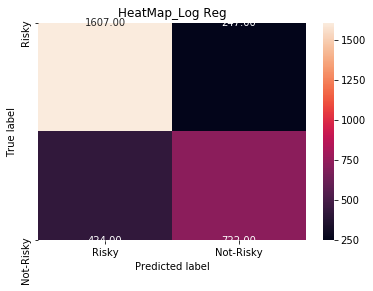

In [14]:
def draw_cm( actual, predicted ):
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )
    sn.heatmap(cm, annot=True, fmt='.2f',
    xticklabels = ["Risky", "Not-Risky"] ,
    yticklabels = ["Risky", "Not-Risky"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('HeatMap_Log Reg')
    plt.show()
draw_cm(test_y,pred_y0 )

In [15]:
print( metrics.classification_report( test_y, pred_y0 ) )

              precision    recall  f1-score   support

         0.0       0.75      0.63      0.68      1146
         1.0       0.79      0.87      0.83      1854

    accuracy                           0.78      3000
   macro avg       0.77      0.75      0.76      3000
weighted avg       0.77      0.78      0.77      3000



In [107]:
acc0 = metrics.accuracy_score(test_y, pred_y0)
print("Accuracy:",acc0)

prec0 = metrics.precision_score(test_y, pred_y0)
print("Precision:",prec0)

recall0 = metrics.recall_score(test_y, pred_y0)
print("Recall:",recall0)

f1sc0 = metrics.f1_score(test_y, pred_y0)
print("F1-Score:",f1sc0)

kappa0 = metrics.cohen_kappa_score(test_y, pred_y0)
print("Kappa-Stat:",kappa0)

Accuracy: 0.7763333333333333
Precision: 0.7912358444116199
Recall: 0.8667745415318231
F1-Score: 0.8272844272844272
Kappa-Stat: 0.5118878229469463


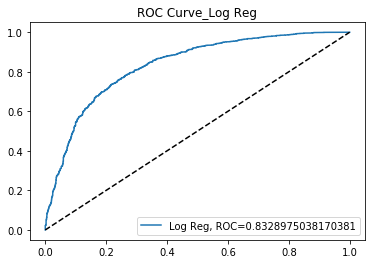

In [23]:
y_pred_proba0 = logit.predict_proba(test_X)[:,1]
fpr0, tpr0, _ = metrics.roc_curve( test_y,  y_pred_proba0)
auc0 = metrics.roc_auc_score( test_y, y_pred_proba0)
plt.plot(fpr0,tpr0,label="Log Reg, ROC="+str(auc0))
plt.legend(loc=4)
plt.title('ROC Curve_Log Reg')
plt.plot([0, 1], [0, 1], 'k--')
plt.show()

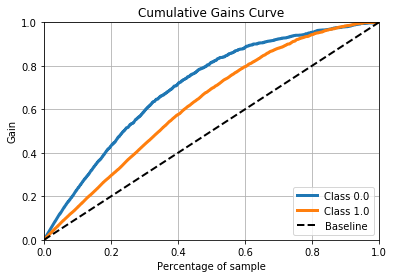

In [18]:
predicted_probas0 = logit.predict_proba(test_X)
skplt.metrics.plot_cumulative_gain(test_y, predicted_probas0)
plt.show()

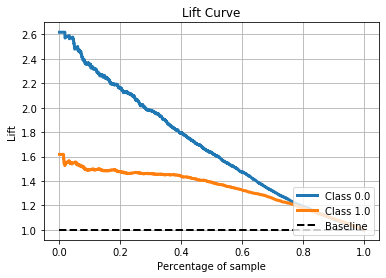

In [19]:
skplt.metrics.plot_lift_curve(test_y, predicted_probas0)
plt.show()

# MLP

In [38]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()
mlp.fit( train_X, train_y)
pred_y1 = mlp.predict(test_X)

In [39]:
r21=r2_score(test_y, pred_y1) 
mse1=mean_squared_error(test_y, pred_y1)
print("R Squared Error : ",r21)
print("Mean Squared Error : ",mse1)

R Squared Error :  0.2417695996204613
Mean Squared Error :  0.179


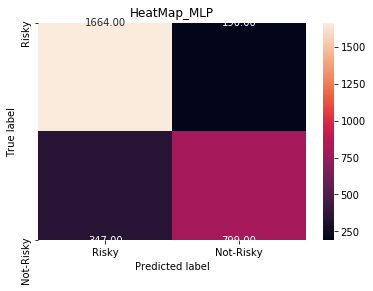

In [40]:
def draw_cm( actual, predicted ):
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )
    sn.heatmap(cm, annot=True, fmt='.2f',
    xticklabels = ["Risky", "Not-Risky"] ,
    yticklabels = ["Risky", "Not-Risky"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('HeatMap_MLP')
    plt.show()
draw_cm(test_y,pred_y1 )

In [42]:
print( metrics.classification_report( test_y, pred_y1 ) )

              precision    recall  f1-score   support

         0.0       0.81      0.70      0.75      1146
         1.0       0.83      0.90      0.86      1854

    accuracy                           0.82      3000
   macro avg       0.82      0.80      0.80      3000
weighted avg       0.82      0.82      0.82      3000



In [43]:
acc1 = metrics.accuracy_score(test_y, pred_y1)
print("Accuracy:",acc1)

prec1 = metrics.precision_score(test_y, pred_y1)
print("Precision:",prec1)

recall1 = metrics.recall_score(test_y, pred_y1)
print("Recall:",recall1)

f1sc1 = metrics.f1_score(test_y, pred_y1)
print("F1-Score:",f1sc1)

kappa1 = metrics.cohen_kappa_score(test_y, pred_y1)
print("Kappa-Stat:",kappa1)

Accuracy: 0.821
Precision: 0.8274490303331675
Recall: 0.8975188781014024
F1-Score: 0.8610608020698576
Kappa-Stat: 0.610701433372674


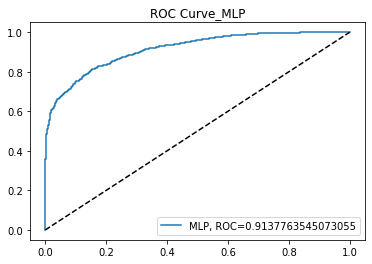

In [44]:
y_pred_proba1 = mlp.predict_proba(test_X)[:,1]
fpr1, tpr1, _ = metrics.roc_curve( test_y,  y_pred_proba1)
auc1 = metrics.roc_auc_score( test_y, y_pred_proba1)
plt.plot(fpr1,tpr1,label="MLP, ROC="+str(auc1))
plt.legend(loc=4)
plt.title('ROC Curve_MLP')
plt.plot([0, 1], [0, 1], 'k--')
plt.show()

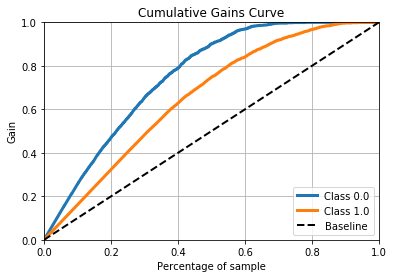

In [45]:
predicted_probas1 = mlp.predict_proba(test_X)
skplt.metrics.plot_cumulative_gain(test_y, predicted_probas1)
plt.show()

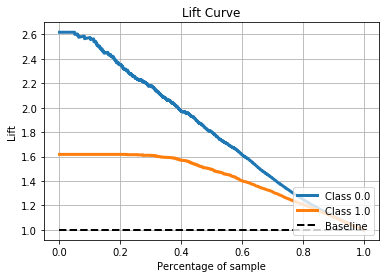

In [46]:
skplt.metrics.plot_lift_curve(test_y, predicted_probas1)
plt.show()

# SVM

In [47]:
from sklearn.svm import SVC

svcl = SVC(kernel='rbf',probability=True)
svcl.fit( train_X, train_y)
pred_y2 = svcl.predict(test_X)

In [48]:
r22=r2_score(test_y, pred_y2) 
mse2=mean_squared_error(test_y, pred_y2)
print("R Squared Error : ",r22)
print("Mean Squared Error : ",mse2)

R Squared Error :  0.08221646136554905
Mean Squared Error :  0.21666666666666667


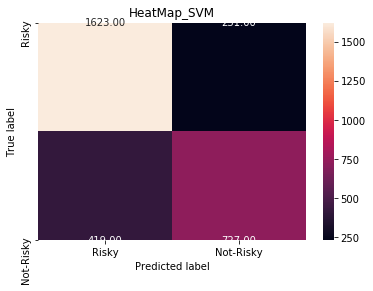

In [49]:
def draw_cm( actual, predicted ):
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )
    sn.heatmap(cm, annot=True, fmt='.2f',
    xticklabels = ["Risky", "Not-Risky"] ,
    yticklabels = ["Risky", "Not-Risky"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('HeatMap_SVM')
    plt.show()
draw_cm(test_y,pred_y2 )

In [50]:
print( metrics.classification_report( test_y, pred_y2 ) )

              precision    recall  f1-score   support

         0.0       0.76      0.63      0.69      1146
         1.0       0.79      0.88      0.83      1854

    accuracy                           0.78      3000
   macro avg       0.78      0.75      0.76      3000
weighted avg       0.78      0.78      0.78      3000



In [51]:
acc2 = metrics.accuracy_score(test_y, pred_y2)
print("Accuracy:",acc2)

prec2 = metrics.precision_score(test_y, pred_y2)
print("Precision:",prec2)

recall2 = metrics.recall_score(test_y, pred_y2)
print("Recall:",recall2)

f1sc2 = metrics.f1_score(test_y, pred_y2)
print("F1-Score:",f1sc2)

kappa2 = metrics.cohen_kappa_score(test_y, pred_y2)
print("Kappa-Stat:",kappa2)

Accuracy: 0.7833333333333333
Precision: 0.7948090107737512
Recall: 0.8754045307443366
F1-Score: 0.8331622176591377
Kappa-Stat: 0.5262694521051128


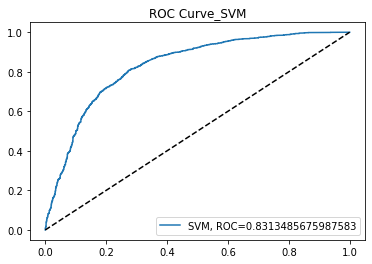

In [52]:
y_pred_proba2 = svcl.predict_proba(test_X)[:,1]
fpr2, tpr2, _ = metrics.roc_curve( test_y,  y_pred_proba2)
auc2 = metrics.roc_auc_score( test_y, y_pred_proba2)
plt.plot(fpr2,tpr2,label="SVM, ROC="+str(auc2))
plt.legend(loc=4)
plt.title('ROC Curve_SVM')
plt.plot([0, 1], [0, 1], 'k--')
plt.show()

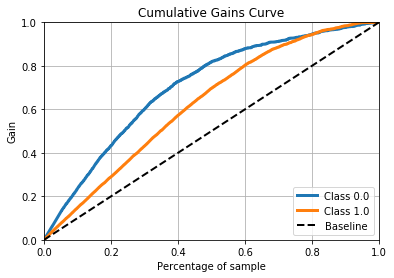

In [53]:
predicted_probas2 = svcl.predict_proba(test_X)
skplt.metrics.plot_cumulative_gain(test_y, predicted_probas2)
plt.show()

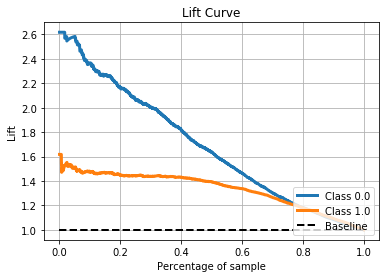

In [54]:
skplt.metrics.plot_lift_curve(test_y, predicted_probas2)
plt.show()

# KNN

In [55]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit( train_X, train_y)
pred_y3 = knn.predict(test_X)

In [56]:
r23=r2_score(test_y, pred_y3) 
mse3=mean_squared_error(test_y, pred_y3)
print("R Squared Error : ",r23)
print("Mean Squared Error : ",mse3)

R Squared Error :  0.3335479534839064
Mean Squared Error :  0.15733333333333333


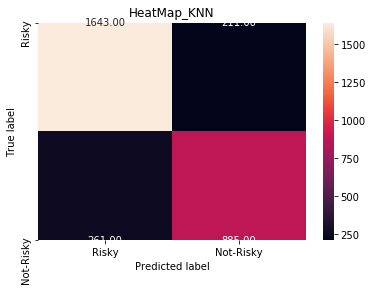

In [57]:
def draw_cm( actual, predicted ):
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )
    sn.heatmap(cm, annot=True, fmt='.2f',
    xticklabels = ["Risky", "Not-Risky"] ,
    yticklabels = ["Risky", "Not-Risky"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('HeatMap_KNN')
    plt.show()
draw_cm(test_y,pred_y3 )

In [58]:
print( metrics.classification_report( test_y, pred_y3 ) )

              precision    recall  f1-score   support

         0.0       0.81      0.77      0.79      1146
         1.0       0.86      0.89      0.87      1854

    accuracy                           0.84      3000
   macro avg       0.84      0.83      0.83      3000
weighted avg       0.84      0.84      0.84      3000



In [60]:
acc3 = metrics.accuracy_score(test_y, pred_y3)
print("Accuracy:",acc3)

prec3 = metrics.precision_score(test_y, pred_y3)
print("Precision:",prec3)

recall3 = metrics.recall_score(test_y, pred_y3)
print("Recall:",recall3)

f1sc3 = metrics.f1_score(test_y, pred_y3)
print("F1-Score:",f1sc3)

kappa3 = metrics.cohen_kappa_score(test_y, pred_y3)
print("Kappa-Stat:",kappa3)

Accuracy: 0.8426666666666667
Precision: 0.8629201680672269
Recall: 0.8861920172599784
F1-Score: 0.8744012772751464
Kappa-Stat: 0.6639746671071066


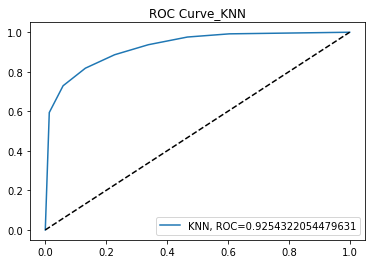

In [61]:
y_pred_proba3 = knn.predict_proba(test_X)[:,1]
fpr3, tpr3, _ = metrics.roc_curve( test_y,  y_pred_proba3)
auc3 = metrics.roc_auc_score( test_y, y_pred_proba3)
plt.plot(fpr3,tpr3,label="KNN, ROC="+str(auc3))
plt.legend(loc=4)
plt.title('ROC Curve_KNN')
plt.plot([0, 1], [0, 1], 'k--')
plt.show()

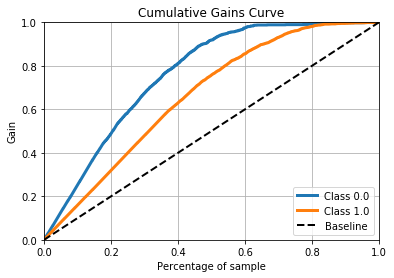

In [62]:
predicted_probas3 = knn.predict_proba(test_X)
skplt.metrics.plot_cumulative_gain(test_y, predicted_probas3)
plt.show()

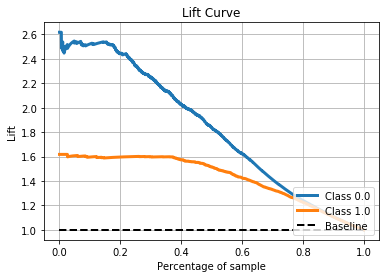

In [63]:
skplt.metrics.plot_lift_curve(test_y, predicted_probas3)
plt.show()

# Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
rf.fit( train_X, train_y)
pred_y4 = rf.predict(test_X)

In [65]:
r24=r2_score(test_y, pred_y4) 
mse4=mean_squared_error(test_y, pred_y4)
print("R Squared Error : ",r24)
print("Mean Squared Error : ",mse4)

R Squared Error :  0.799499596175243
Mean Squared Error :  0.04733333333333333


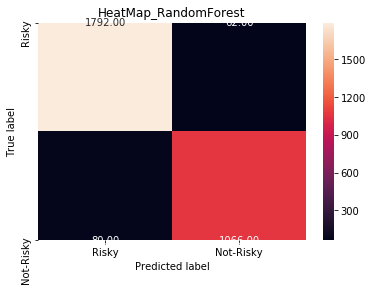

In [66]:
def draw_cm( actual, predicted ):
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )
    sn.heatmap(cm, annot=True, fmt='.2f',
    xticklabels = ["Risky", "Not-Risky"] ,
    yticklabels = ["Risky", "Not-Risky"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('HeatMap_RandomForest')
    plt.show()
draw_cm(test_y,pred_y4 )

In [67]:
print( metrics.classification_report( test_y, pred_y4 ) )

              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94      1146
         1.0       0.96      0.97      0.96      1854

    accuracy                           0.95      3000
   macro avg       0.95      0.95      0.95      3000
weighted avg       0.95      0.95      0.95      3000



In [69]:
acc4 = metrics.accuracy_score(test_y, pred_y4)
print("Accuracy:",acc4)

prec4 = metrics.precision_score(test_y, pred_y4)
print("Precision:",prec4)

recall4 = metrics.recall_score(test_y, pred_y4)
print("Recall:",recall4)

f1sc4 = metrics.f1_score(test_y, pred_y4)
print("F1-Score:",f1sc4)

kappa4 = metrics.cohen_kappa_score(test_y, pred_y4)
print("Kappa-Stat:",kappa4)

Accuracy: 0.9526666666666667
Precision: 0.9572649572649573
Recall: 0.9665587918015103
F1-Score: 0.9618894256575417
Kappa-Stat: 0.899448239919332


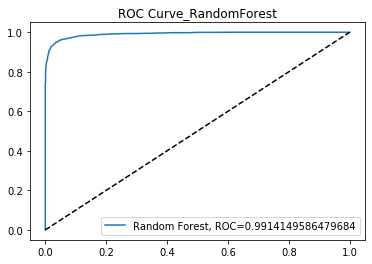

In [70]:
y_pred_proba4 = rf.predict_proba(test_X)[:,1]
fpr4, tpr4, _ = metrics.roc_curve( test_y,  y_pred_proba4)
auc4 = metrics.roc_auc_score( test_y, y_pred_proba4)
plt.plot(fpr4,tpr4,label="Random Forest, ROC="+str(auc4))
plt.legend(loc=4)
plt.title('ROC Curve_RandomForest')
plt.plot([0, 1], [0, 1], 'k--')
plt.show()

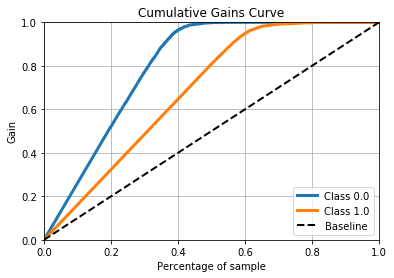

In [71]:
predicted_probas4 = rf.predict_proba(test_X)
skplt.metrics.plot_cumulative_gain(test_y, predicted_probas4)
plt.show()

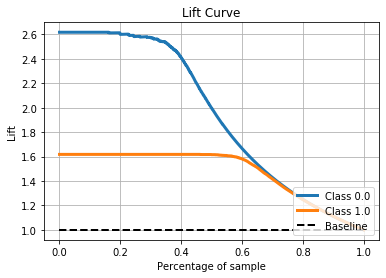

In [72]:
skplt.metrics.plot_lift_curve(test_y, predicted_probas4)
plt.show()

# Ensemble-AdaBoost

In [73]:
from sklearn.ensemble import AdaBoostClassifier

ens = AdaBoostClassifier(n_estimators=100)
ens.fit( train_X, train_y)
pred_y5 = ens.predict(test_X)

In [74]:
r25=r2_score(test_y, pred_y5) 
mse5=mean_squared_error(test_y, pred_y5)
print("R Squared Error : ",r25)
print("Mean Squared Error : ",mse5)

R Squared Error :  0.23612170092117235
Mean Squared Error :  0.18033333333333335


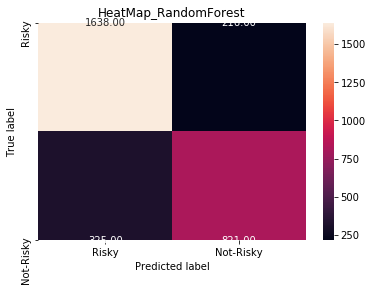

In [75]:
def draw_cm( actual, predicted ):
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )
    sn.heatmap(cm, annot=True, fmt='.2f',
    xticklabels = ["Risky", "Not-Risky"] ,
    yticklabels = ["Risky", "Not-Risky"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('HeatMap_RandomForest')
    plt.show()
draw_cm(test_y,pred_y5 )

In [76]:
print( metrics.classification_report( test_y, pred_y5 ) )

              precision    recall  f1-score   support

         0.0       0.79      0.72      0.75      1146
         1.0       0.83      0.88      0.86      1854

    accuracy                           0.82      3000
   macro avg       0.81      0.80      0.81      3000
weighted avg       0.82      0.82      0.82      3000



In [78]:
acc5 = metrics.accuracy_score(test_y, pred_y5)
print("Accuracy:",acc5)

prec5 = metrics.precision_score(test_y, pred_y5)
print("Precision:",prec5)

recall5 = metrics.recall_score(test_y, pred_y5)
print("Recall:",recall5)

f1sc5 = metrics.f1_score(test_y, pred_y5)
print("F1-Score:",f1sc5)

kappa5 = metrics.cohen_kappa_score(test_y, pred_y5)
print("Kappa-Stat:",kappa5)

Accuracy: 0.8196666666666667
Precision: 0.8344370860927153
Recall: 0.883495145631068
F1-Score: 0.8582656536547028
Kappa-Stat: 0.6109962235714717


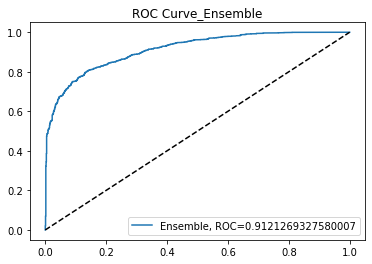

In [79]:
y_pred_proba5 = ens.predict_proba(test_X)[:,1]
fpr5, tpr5, _ = metrics.roc_curve( test_y,  y_pred_proba5)
auc5 = metrics.roc_auc_score( test_y, y_pred_proba5)
plt.plot(fpr5,tpr5,label="Ensemble, ROC="+str(auc5))
plt.legend(loc=4)
plt.title('ROC Curve_Ensemble')
plt.plot([0, 1], [0, 1], 'k--')
plt.show()

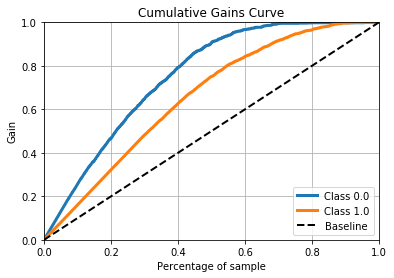

In [80]:
predicted_probas5 = ens.predict_proba(test_X)
skplt.metrics.plot_cumulative_gain(test_y, predicted_probas5)
plt.show()

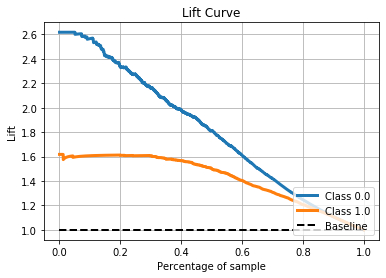

In [81]:
skplt.metrics.plot_lift_curve(test_y, predicted_probas5)
plt.show()

# Ensemble-Gradient Boosting

In [82]:
from sklearn.ensemble import GradientBoostingClassifier

ensgr = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
ensgr.fit( train_X, train_y)
pred_y6 = ensgr.predict(test_X)

In [83]:
r26=r2_score(test_y, pred_y6) 
mse6=mean_squared_error(test_y, pred_y6)
print("R Squared Error : ",r26)
print("Mean Squared Error : ",mse6)

R Squared Error :  0.2657731690924392
Mean Squared Error :  0.17333333333333334


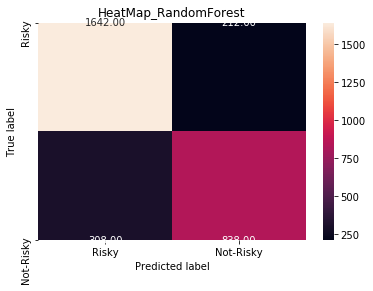

In [84]:
def draw_cm( actual, predicted ):
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )
    sn.heatmap(cm, annot=True, fmt='.2f',
    xticklabels = ["Risky", "Not-Risky"] ,
    yticklabels = ["Risky", "Not-Risky"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('HeatMap_RandomForest')
    plt.show()
draw_cm(test_y,pred_y6 )

In [85]:
print( metrics.classification_report( test_y, pred_y6 ) )

              precision    recall  f1-score   support

         0.0       0.80      0.73      0.76      1146
         1.0       0.84      0.89      0.86      1854

    accuracy                           0.83      3000
   macro avg       0.82      0.81      0.81      3000
weighted avg       0.83      0.83      0.83      3000



In [86]:
acc6 = metrics.accuracy_score(test_y, pred_y6)
print("Accuracy:",acc6)

prec6 = metrics.precision_score(test_y, pred_y6)
print("Precision:",prec6)

recall6 = metrics.recall_score(test_y, pred_y6)
print("Recall:",recall6)

f1sc6 = metrics.f1_score(test_y, pred_y6)
print("F1-Score:",f1sc6)

kappa6 = metrics.cohen_kappa_score(test_y, pred_y6)
print("Kappa-Stat:",kappa6)

Accuracy: 0.8266666666666667
Precision: 0.8420512820512821
Recall: 0.8856526429341963
F1-Score: 0.8633017875920084
Kappa-Stat: 0.6269192136604964


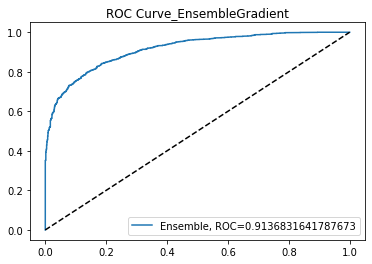

In [87]:
y_pred_proba6 = ensgr.predict_proba(test_X)[:,1]
fpr6, tpr6, _ = metrics.roc_curve( test_y,  y_pred_proba6)
auc6 = metrics.roc_auc_score( test_y, y_pred_proba6)
plt.plot(fpr6,tpr6,label="Ensemble, ROC="+str(auc6))
plt.legend(loc=4)
plt.title('ROC Curve_EnsembleGradient')
plt.plot([0, 1], [0, 1], 'k--')
plt.show()

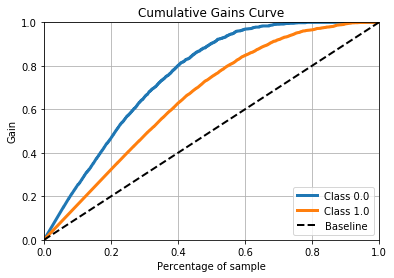

In [88]:
predicted_probas6 = ensgr.predict_proba(test_X)
skplt.metrics.plot_cumulative_gain(test_y, predicted_probas6)
plt.show()

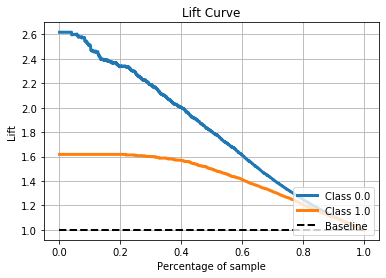

In [89]:
skplt.metrics.plot_lift_curve(test_y, predicted_probas6)
plt.show()

# ROC Curve Comparison

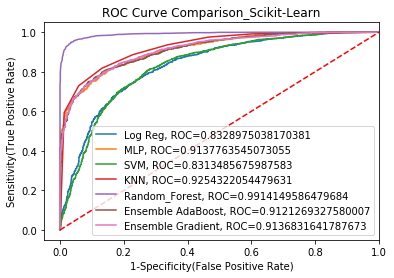

In [90]:
plt.plot(fpr0,tpr0,label="Log Reg, ROC="+str(auc0))
plt.plot(fpr1,tpr1,label="MLP, ROC="+str(auc1))
plt.plot(fpr2,tpr2,label="SVM, ROC="+str(auc2)) 
plt.plot(fpr3,tpr3,label="KNN, ROC="+str(auc3))
plt.plot(fpr4,tpr4,label="Random_Forest, ROC="+str(auc4))
plt.plot(fpr5,tpr5,label="Ensemble AdaBoost, ROC="+str(auc5))
plt.plot(fpr6,tpr6,label="Ensemble Gradient, ROC="+str(auc6))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('ROC Curve Comparison_Scikit-Learn')
plt.legend(loc="lower right")
plt.show() 

# Accuracy Score Comparison

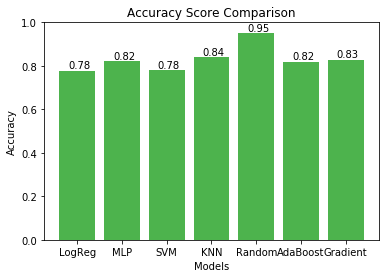

In [188]:
xval0 = np.arange(7)
yval0 = [acc0,acc1,acc2,acc3,acc4,acc5,acc6]
yval10 = [round(x,2) for x in yval0]
xname = ['LogReg','MLP','SVM','KNN','Random','AdaBoost','Gradient']

plt.bar(xval0,yval0,color=(0.3, 0.7, 0.3))
plt.xticks(xval0,xname)
plt.xlabel('Models')
plt.ylabel('Accuracy')
for i, top_label in enumerate(yval10):
    plt.text(xval0[i] - 0.20, top_label + 0.01, str(top_label))
plt.title('Accuracy Score Comparison')
plt.show()

# Precision Score Comparison

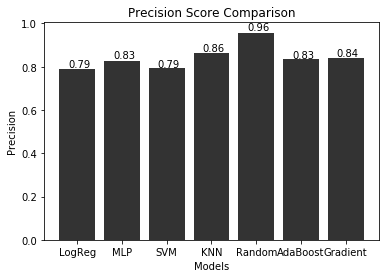

In [187]:
xval1 = np.arange(7)
yval1 = [prec0,prec1,prec2,prec3,prec4,prec5,prec6]
yval11 = [round(x,2) for x in yval1]
xname = ['LogReg','MLP','SVM','KNN','Random','AdaBoost','Gradient']

plt.bar(xval1,yval1,color=(0.2, 0.2, 0.2))
plt.xticks(xval1,xname)
plt.xlabel('Models')
plt.ylabel('Precision')
for i, top_label in enumerate(yval11):
    plt.text(xval1[i] - 0.20, top_label + 0.01, str(top_label))
plt.title('Precision Score Comparison')
plt.show()

# Recall Comparison

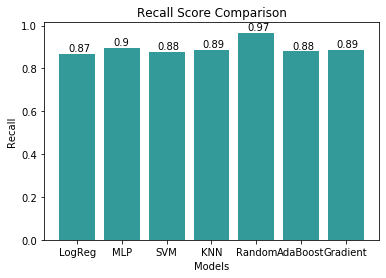

In [186]:
xval2 = np.arange(7)
yval2 = [recall0,recall1,recall2,recall3,recall4,recall5,recall6]
yval12 = [round(x,2) for x in yval2]
xname = ['LogReg','MLP','SVM','KNN','Random','AdaBoost','Gradient']

plt.bar(xval2,yval2,color=(0.2, 0.6, 0.6))
plt.xticks(xval2,xname)
plt.xlabel('Models')
plt.ylabel('Recall')
for i, top_label in enumerate(yval12):
    plt.text(xval2[i] - 0.20, top_label + 0.01, str(top_label))
plt.title('Recall Score Comparison')
plt.show()

# F1-Score Comparison

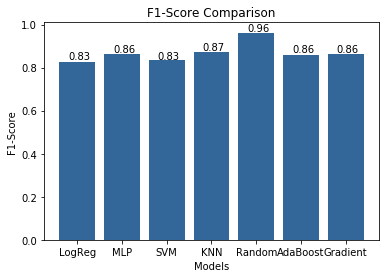

In [185]:
xval3 = np.arange(7)
yval3 = [f1sc0,f1sc1,f1sc2,f1sc3,f1sc4,f1sc5,f1sc6]
yval13 = [round(x,2) for x in yval3]
xname = ['LogReg','MLP','SVM','KNN','Random','AdaBoost','Gradient']

plt.bar(xval3,yval3,color=(0.2, 0.4, 0.6))
plt.xticks(xval3,xname)
plt.xlabel('Models')
plt.ylabel('F1-Score')
for i, top_label in enumerate(yval13):
    plt.text(xval3[i] - 0.20, top_label + 0.01, str(top_label))
plt.title('F1-Score Comparison')
plt.show()

# Kappa Statistics Comparison

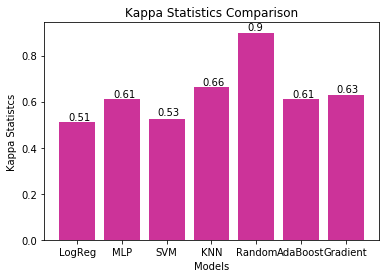

In [184]:
xval4 = np.arange(7)
yval4 = [kappa0,kappa1,kappa2,kappa3,kappa4,kappa5,kappa6]
yval14 = [round(x,2) for x in yval4]
xname = ['LogReg','MLP','SVM','KNN','Random','AdaBoost','Gradient']

plt.bar(xval4,yval4,color=(0.8, 0.2, 0.6))
plt.xticks(xval4,xname)
plt.xlabel('Models')
plt.ylabel('Kappa Statistcs')
for i, top_label in enumerate(yval14):
    plt.text(xval4[i] - 0.20, top_label + 0.01, str(top_label))
plt.title('Kappa Statistics Comparison')
plt.show()

# Classification Report

In [197]:
pred_all = [pred_y0, pred_y1, pred_y2, pred_y3, pred_y4, pred_y5, pred_y6]
name_all = ['LogReg','MLP','SVM','KNN','Random','AdaBoost','Gradient']
acc_all = []
prec_all = []
recall_all = []
f1score_all = []
kappa_all = []

for i in range(7):
    acc_all.append(metrics.accuracy_score(test_y, pred_all[i]))
    prec_all.append(metrics.precision_score(test_y, pred_all[i]))
    recall_all.append(metrics.recall_score(test_y, pred_all[i]))
    f1score_all.append(metrics.f1_score(test_y, pred_all[i]))
    kappa_all.append(metrics.cohen_kappa_score(test_y, pred_all[i]))

df_class_report = pd.DataFrame({"Model":name_all,"Accuracy":acc_all,"Precision":prec_all,"Recall":recall_all,"F1-Score":f1score_all,"Kappa-Stat":kappa_all})

print(df_class_report)

      Model  Accuracy  Precision    Recall  F1-Score  Kappa-Stat
0    LogReg  0.776333   0.791236  0.866775  0.827284    0.511888
1       MLP  0.821000   0.827449  0.897519  0.861061    0.610701
2       SVM  0.783333   0.794809  0.875405  0.833162    0.526269
3       KNN  0.842667   0.862920  0.886192  0.874401    0.663975
4    Random  0.952667   0.957265  0.966559  0.961889    0.899448
5  AdaBoost  0.819667   0.834437  0.883495  0.858266    0.610996
6  Gradient  0.826667   0.842051  0.885653  0.863302    0.626919


# Correlation

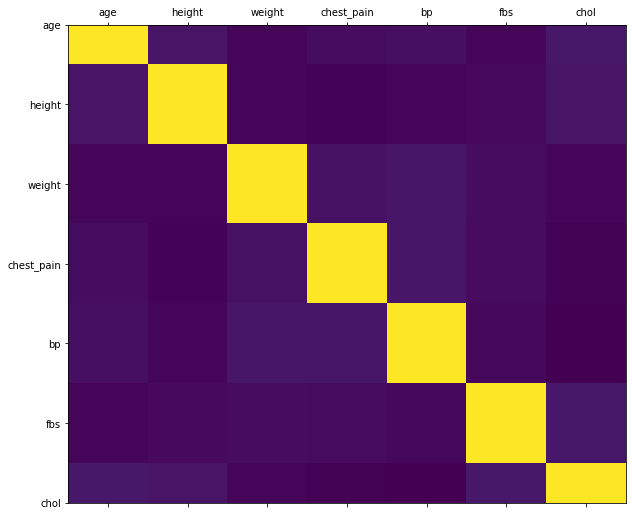

In [88]:
size=10
corr = df.iloc[:,:-1].corr()
fig, ax = plt.subplots(figsize=(size, size))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

In [189]:
col = df.columns.tolist()[:-1]
print(col)

['age', 'height', 'weight', 'chest_pain', 'bp', 'fbs', 'chol']


In [192]:
categ_col = []
for n in col:
#     df.i.value_counts().plot.bar().grid()
#     print(df[n])
    df_col = list(set(df[n].tolist()))
#     print(df_col)
    if len(df_col) < 10:
        categ_col.append(n)
contin_col = col-categ_col       

TypeError: unsupported operand type(s) for -: 'list' and 'list'

In [193]:
print(categ_col)

['chest_pain']


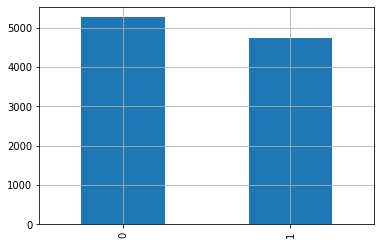

In [92]:
df['chest_pain'].value_counts().plot.bar().grid()